## Predicting Dog Breed

### Step 1: Assigning Class Names and Class Index

In [7]:
class_mapping = {'afghan_hound': 0,
 'african_hunting_dog': 1,
 'airedale': 2,
 'basenji': 3,
 'basset': 4,
 'beagle': 5,
 'bedlington_terrier': 6,
 'bernese_mountain_dog': 7,
 'black-and-tan_coonhound': 8,
 'blenheim_spaniel': 9,
 'bloodhound': 10,
 'bluetick': 11,
 'border_collie': 12,
 'border_terrier': 13,
 'borzoi': 14,
 'boston_bull': 15,
 'bouvier_des_flandres': 16,
 'brabancon_griffon': 17,
 'bull_mastiff': 18,
 'cairn': 19,
 'cardigan': 20,
 'chesapeake_bay_retriever': 21,
 'chow': 22,
 'clumber': 23,
 'cocker_spaniel': 24,
 'collie': 25,
 'curly-coated_retriever': 26,
 'dhole': 27,
 'dingo': 28,
 'doberman': 29,
 'english_foxhound': 30,
 'english_setter': 31,
 'entlebucher': 32,
 'flat-coated_retriever': 33,
 'german_shepherd': 34,
 'german_short-haired_pointer': 35,
 'golden_retriever': 36,
 'gordon_setter': 37,
 'great_dane': 38,
 'great_pyrenees': 39,
 'groenendael': 40,
 'ibizan_hound': 41,
 'irish_setter': 42,
 'irish_terrier': 43,
 'irish_water_spaniel': 44,
 'irish_wolfhound': 45,
 'japanese_spaniel': 46,
 'keeshond': 47,
 'kerry_blue_terrier': 48,
 'komondor': 49,
 'kuvasz': 50,
 'labrador_retriever': 51,
 'leonberg': 52,
 'lhasa': 53,
 'malamute': 54,
 'malinois': 55,
 'maltese_dog': 56,
 'mexican_hairless': 57,
 'miniature_pinscher': 58,
 'miniature_schnauzer': 59,
 'newfoundland': 60,
 'norfolk_terrier': 61,
 'norwegian_elkhound': 62,
 'norwich_terrier': 63,
 'old_english_sheepdog': 64,
 'otterhound': 65,
 'papillon': 66,
 'pekinese': 67,
 'pembroke': 68,
 'pomeranian': 69,
 'pug': 70,
 'redbone': 71,
 'rhodesian_ridgeback': 72,
 'rottweiler': 73,
 'saint_bernard': 74,
 'saluki': 75,
 'samoyed': 76,
 'schipperke': 77,
 'scotch_terrier': 78,
 'scottish_deerhound': 79,
 'sealyham_terrier': 80,
 'shetland_sheepdog': 81,
 'standard_poodle': 82,
 'standard_schnauzer': 83,
 'sussex_spaniel': 84,
 'tibetan_mastiff': 85,
 'tibetan_terrier': 86,
 'toy_terrier': 87,
 'vizsla': 88,
 'weimaraner': 89,
 'whippet': 90,
 'wire-haired_fox_terrier': 91,
 'yorkshire_terrier': 92}

### Step 2: Loading the Model and preprocessing the input

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle

# Load the custom focal loss function
def focal_loss_fixed(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_true = tf.cast(y_true, tf.float32)
    alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
    focal_weight = tf.pow(1 - y_pred, gamma)
    loss = tf.reduce_mean(-alpha_factor * focal_weight * tf.math.log(y_pred + tf.keras.backend.epsilon()))
    return loss

# Load the main model with the custom loss function
model = load_model(
    '../models/focalnet_model.h5',
    custom_objects={'focal_loss_fixed': focal_loss_fixed}
)

# Load the one-hot encoding model from pickle file
with open('../models/shuffled_data.pkl', 'rb') as f:  # Replace with actual path to your pickle file
    one_hot_model = pickle.load(f)

print("Models loaded successfully!")


# Invert the class mapping for reverse lookup
reverse_class_mapping = {value: key for key, value in class_mapping.items()}

# Function to preprocess and predict a single image
def predict_image(img_path, model, target_size=(224, 224)):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.cast(img_array, tf.float32)  # Ensure proper dtype
    
    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    return predicted_class, predictions[0]

# Function to convert predictions to one-hot encoding using the saved one-hot encoding model
def encode_predictions_with_model(predictions, one_hot_model):
    # Check if the one_hot_model is a numpy array (i.e., one-hot encoding matrix)
    if isinstance(one_hot_model, np.ndarray):
        # Use the predicted class index to retrieve the one-hot encoded vector
        predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class
        return one_hot_model[predicted_class]  # Return the one-hot encoded vector
    
    # If the model is not a numpy array, assume it can predict (like a Scikit-learn model)
    if hasattr(one_hot_model, 'predict_proba'):
        return one_hot_model.predict_proba(predictions)
    
    # Return None if neither condition is met
    return None

Models loaded successfully!


### Step 3: Enter Input 

1/1 [==============================] - 0s 69ms/step
Prediction probabilities: [6.7706178e-06 3.2650580e-06 9.4521938e-06 7.0157712e-06 1.4569805e-04
 3.9239578e-05 1.5819414e-06 9.5047490e-06 9.3788201e-01 3.7425559e-07
 5.7330093e-04 1.5403852e-03 4.1135701e-07 1.4981401e-07 3.7033367e-08
 3.3012905e-06 5.4442705e-07 1.5445452e-05 6.3971984e-06 4.2283202e-07
 3.1013803e-07 5.9640388e-06 1.4634307e-06 6.3380148e-06 2.9511746e-06
 2.1809192e-06 2.6438147e-06 4.8054090e-07 1.1231396e-05 2.9855570e-02
 8.5895263e-06 4.8646120e-06 2.4908036e-03 6.0888516e-07 1.8783290e-05
 7.2979892e-06 7.8476933e-07 3.8815592e-03 9.6179065e-06 2.0355619e-06
 1.3285431e-06 1.4492670e-06 8.7654450e-07 1.0894591e-06 3.3106400e-05
 4.6551727e-07 4.0802443e-06 2.0466095e-07 5.0632383e-07 6.1014610e-08
 8.4096922e-07 1.5522722e-04 3.2913115e-07 8.0344662e-06 1.2957739e-06
 4.7817923e-07 3.9906699e-06 1.7588524e-06 4.9903512e-04 1.6696151e-05
 1.8886582e-06 9.7320060e-07 1.0204883e-06 9.4938713e-07 6.8297072e-07

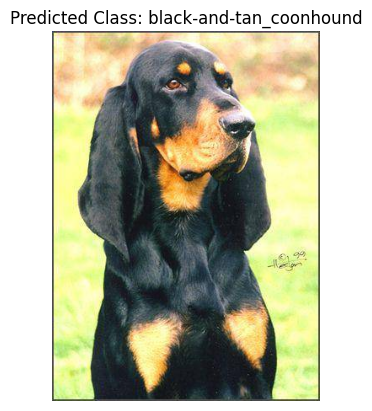

In [16]:
# Path to the image you want to predict
img_path = "C:/Users/dell/Desktop/Monvitech projects/Dog Breed/jupyter notebook/data/test/black-and-tan_coonhound/black-and-tan_coonhound70.jpg"

# Predict the image
predicted_class, predictions = predict_image(img_path, model)

# Convert the predictions to one-hot encoding using the saved one-hot encoding model
encoded_predictions = encode_predictions_with_model(predictions, one_hot_model)

# Match the predicted class with class name
predicted_class_name = reverse_class_mapping.get(predicted_class, "Unknown Class")

# Print the predicted class, class name, and the probability distribution
print(f"Prediction probabilities: {predictions}")
print('\n\n')
print(f"Predicted class index: {predicted_class}")
print(f"Predicted class name: {predicted_class_name}")
# Optionally: Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()
